Téléchargement du database 

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion et chargement
conn = sqlite3.connect('../data/database.db')
df = pd.read_sql_query("SELECT * FROM produits", conn)
conn.close()

# On transforme la colonne ingredients en une liste
df['ingredients'] = df['ingredients'].str.split(',')

Analyse des données

Nombre de produits

In [15]:
print(f"Nombre de produits: {len(df)}")

Nombre de produits: 197


Répartition nutri score

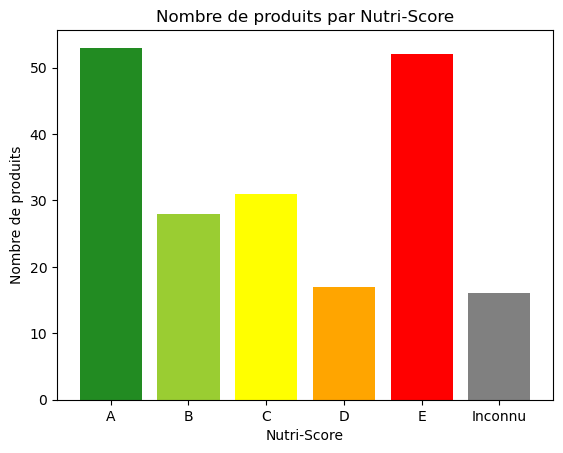

In [ ]:
# On compte le nombre de produits par Nutri-Score
stats_nutri = df['nutriscore'].value_counts(dropna=False).sort_index()  # pour avoir les None et A, B, C, D, E dans l'ordre
stats_nutri.index = stats_nutri.index.fillna('Inconnu')

dico_couleurs = {
    'A': 'forestgreen', 
    'B': 'yellowgreen', 
    'C': 'yellow', 
    'D': 'orange', 
    'E': 'red',
    'Inconnu' : 'grey'
}

liste_couleurs = [dico_couleurs.get(grade) for grade in stats_nutri.index]

# Affichage du graphique
plt.bar(stats_nutri.index, stats_nutri.values, color=liste_couleurs)

plt.title('Nombre de produits par Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Nombre de produits')

plt.show()